# Bilateral

In [15]:
import sys
sys.path.append('../..')

In [16]:
import matplotlib.pyplot
import matplotlib.cm
import matplotlib

matplotlib.rcParams['figure.facecolor'] = '303030'
matplotlib.rcParams['axes.facecolor'] = '303030'
matplotlib.rcParams['text.color'] = 'FFFFFF'
matplotlib.rcParams['xtick.color'] = 'FFFFFF'
matplotlib.rcParams['ytick.color'] = 'FFFFFF'
matplotlib.rcParams['axes.labelcolor'] = 'FFFFFF'


import numpy

import pathlib

In [17]:
import lasp.convert
import lasp.metrics
import lasp.noise
import lasp.io
import lasp.filters.nolinear

In [18]:
path_results =  pathlib.Path('./results')
path_output = path_results / pathlib.Path('bilateral')
if not(path_output.exists()):
    path_output.mkdir()

In [19]:
img = lasp.io.read(image_path = path_results / pathlib.Path('original.npy'))
img_noised = lasp.io.read(image_path = path_results / pathlib.Path('noised.npy'))

In [20]:
SIGMA_COLOR_INF = 0.7
SIGMA_COLOR_SUP = 1.3
NB_SIGMA_COLOR = 6

SIGMA_SPATIAL_INF = 1
SIGMA_SPATIAL_SUP = 2
NB_SIGMA_SPATIAL = 10

metrics = {
    'mae' : numpy.zeros(shape=(NB_SIGMA_SPATIAL, NB_SIGMA_COLOR)),
    'mse' : numpy.zeros(shape=(NB_SIGMA_SPATIAL, NB_SIGMA_COLOR)),
    'psnr' : numpy.zeros(shape=(NB_SIGMA_SPATIAL, NB_SIGMA_COLOR))
}

sigma_color = numpy.arange(SIGMA_COLOR_INF, SIGMA_COLOR_SUP, (SIGMA_COLOR_SUP-SIGMA_COLOR_INF)/NB_SIGMA_COLOR)
sigma_spatial = numpy.arange(SIGMA_SPATIAL_INF, SIGMA_SPATIAL_SUP, (SIGMA_SPATIAL_SUP-SIGMA_SPATIAL_INF)/NB_SIGMA_SPATIAL)

In [21]:
for i in range(0, NB_SIGMA_SPATIAL):
    for j in range(0, NB_SIGMA_COLOR):    
        img_denoised = lasp.filters.nolinear.bilateral(img_noised, sigma_spatial[i], sigma_color[j], size=5)
        metrics['mae'][i, j] = lasp.metrics.mean_absolute_error(img_denoised, img)
        metrics['mse'][i, j] = lasp.metrics.mean_squared_error(img_denoised, img)
        metrics['psnr'][i, j] = lasp.metrics.peak_signal_to_noise_ratio(img_denoised, img)

with open(path_output / 'mse.npy', 'wb') as f:
    numpy.save(f, metrics['mse'])

with open(path_output / 'psnr.npy', 'wb') as f:
    numpy.save(f, metrics['psnr'])

with open(path_output / 'mae.npy', 'wb') as f:
    numpy.save(f, metrics['mae'])

## Figure for presentation

In [22]:
SIGMA_COLOR_INF = 0.7
SIGMA_COLOR_SUP = 1.3
NB_SIGMA_COLOR = 6

SIGMA_SPATIAL_INF = 1
SIGMA_SPATIAL_SUP = 2
NB_SIGMA_SPATIAL = 10

sigma_color = numpy.arange(SIGMA_COLOR_INF, SIGMA_COLOR_SUP, (SIGMA_COLOR_SUP-SIGMA_COLOR_INF)/NB_SIGMA_COLOR)
sigma_spatial = numpy.arange(SIGMA_SPATIAL_INF, SIGMA_SPATIAL_SUP, (SIGMA_SPATIAL_SUP-SIGMA_SPATIAL_INF)/NB_SIGMA_SPATIAL)

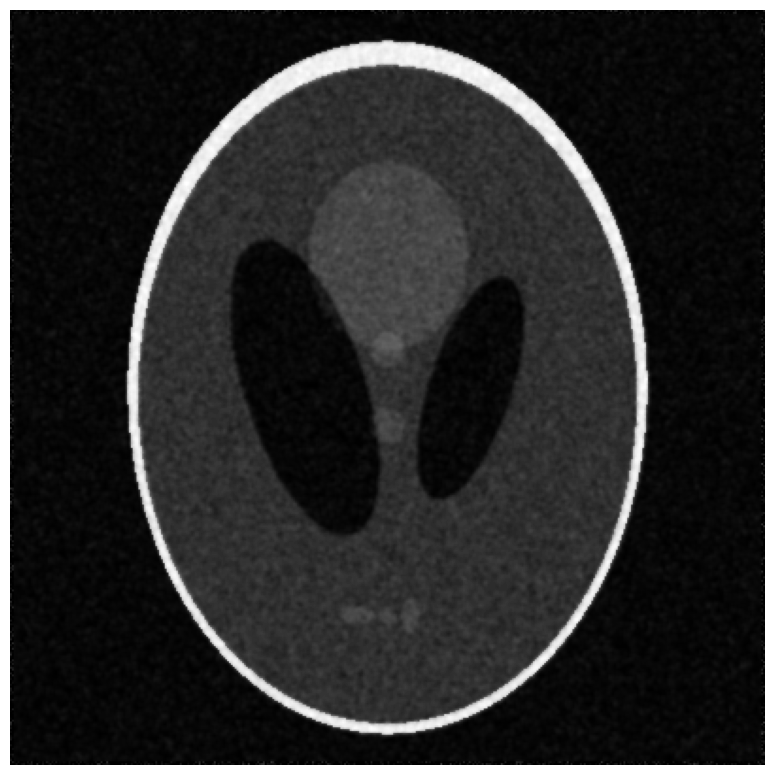

In [23]:
mae = numpy.array(numpy.load(path_output / 'mae.npy')).T
index = numpy.argmin(mae, axis=None)
i_mae, j_mae = numpy.unravel_index(index, shape=mae.shape)

# print(i_mae, j_mae)

img_denoised = lasp.filters.nolinear.bilateral(img_noised, sigma_spatial[j_mae], sigma_color[i_mae], size=5)

figure = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)
matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.imshow(img_denoised, cmap='gray')

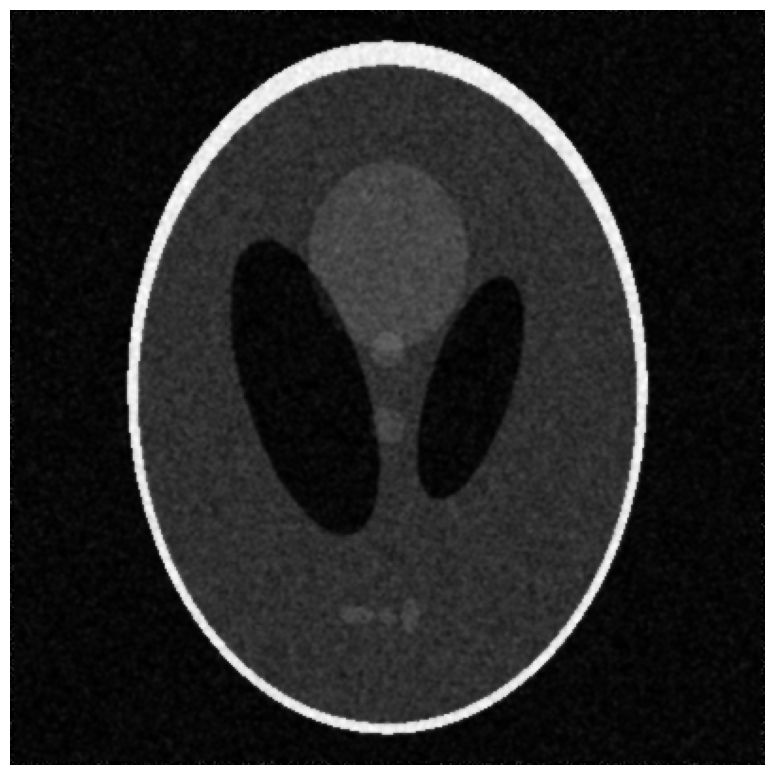

In [24]:
mse = numpy.array(numpy.load(path_output / 'mse.npy')).T
index = numpy.argmin(mse, axis=None)
i_mse, j_mse = numpy.unravel_index(index, shape=mse.shape)

# print(i_mse, j_mse)

img_denoised = lasp.filters.nolinear.bilateral(img_noised, sigma_spatial[j_mse], sigma_color[i_mse], size=5)

figure = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)
matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.imshow(img_denoised, cmap='gray')

In [29]:
import matplotlib.pyplot
import numpy

# import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fontsize = 30

X, Y = numpy.meshgrid(sigma_spatial, sigma_color)

Xp = numpy.reshape(X, newshape=(1, -1))[0]
Yp = numpy.reshape(Y, newshape=(1, -1))[0]

X_plt: numpy.ndarray = X
Y_plt: numpy.ndarray = Y

/run/user/1000/ipykernel_16569/1419760140.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


ValueError: Argument Z must be 2-dimensional.

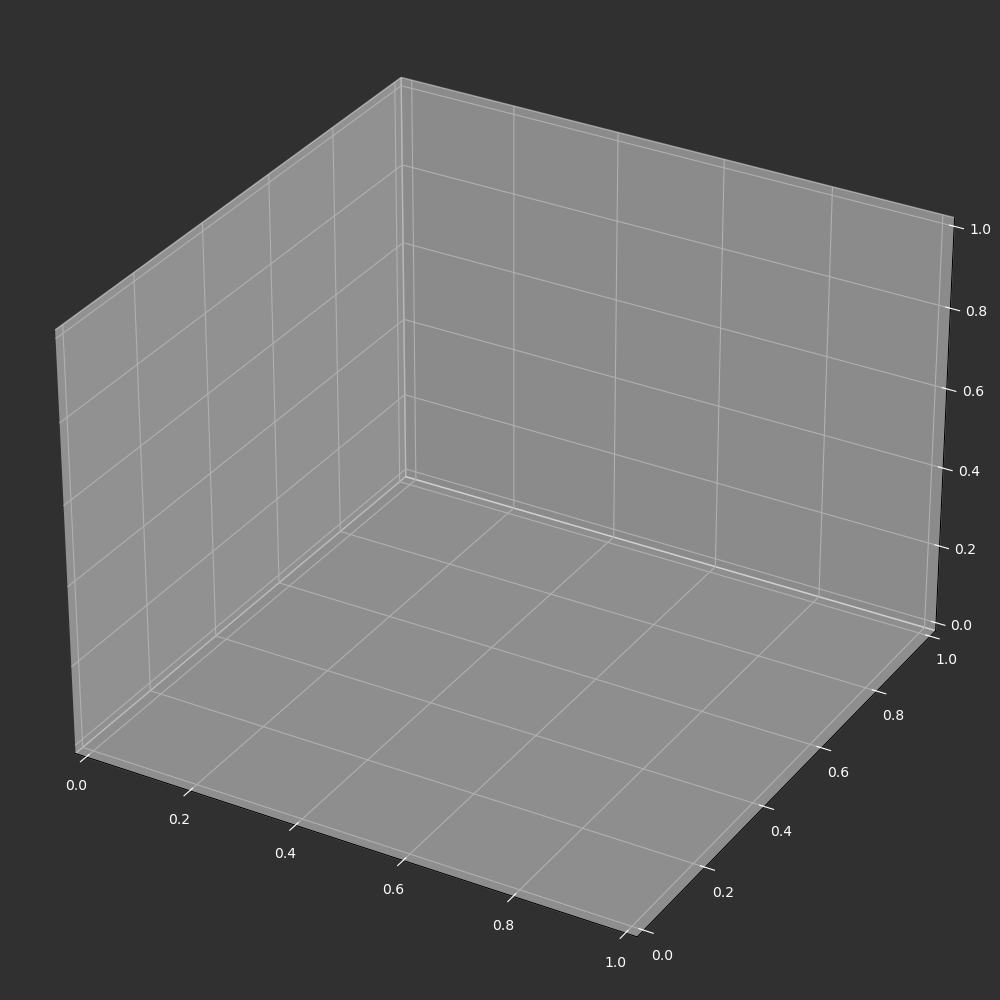

In [30]:
# %matplotlib widget

# import matplotlib.pyplot
# import numpy

# # import numpy as np
# from mpl_toolkits.mplot3d import Axes3D


# Z_mae_plt: numpy.ndarray = mae

# coord_best: tuple[int, int] = i_mae, j_mae

# # Set up a figure twice as tall as it is wide
# fig = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)


# # Graph 3D MSE

# ax = Axes3D(fig)

# ## Display surface and points
# _ = ax.plot_surface(X_plt, Y_plt, Z_mae_plt, color='blue', alpha=0.1)
# _ = ax.scatter(X_plt, Y_plt, Z_mae_plt, color='green', marker='x')

# ## Display best point
# s_color, s_spatial, mae = X_plt[coord_best], Y_plt[coord_best], Z_mae_plt[coord_best]
# _ = ax.scatter(s_color, s_spatial, mae, color='red', marker='o')
# ax.text(s_color, s_spatial, mae, '({:.3f}, {}, {:.3f})'.format(s_color, s_spatial, mae), color='red')

# # setting title and labels
# ax.set_title('MAE', fontsize=fontsize)
# ax.set_xlabel('$\sigma_{spatial}$')
# ax.set_ylabel('$\sigma_{color}$')
# ax.set_zlabel('mae')

# matplotlib.pyplot.show()

ValueError: Argument Z must be 2-dimensional.

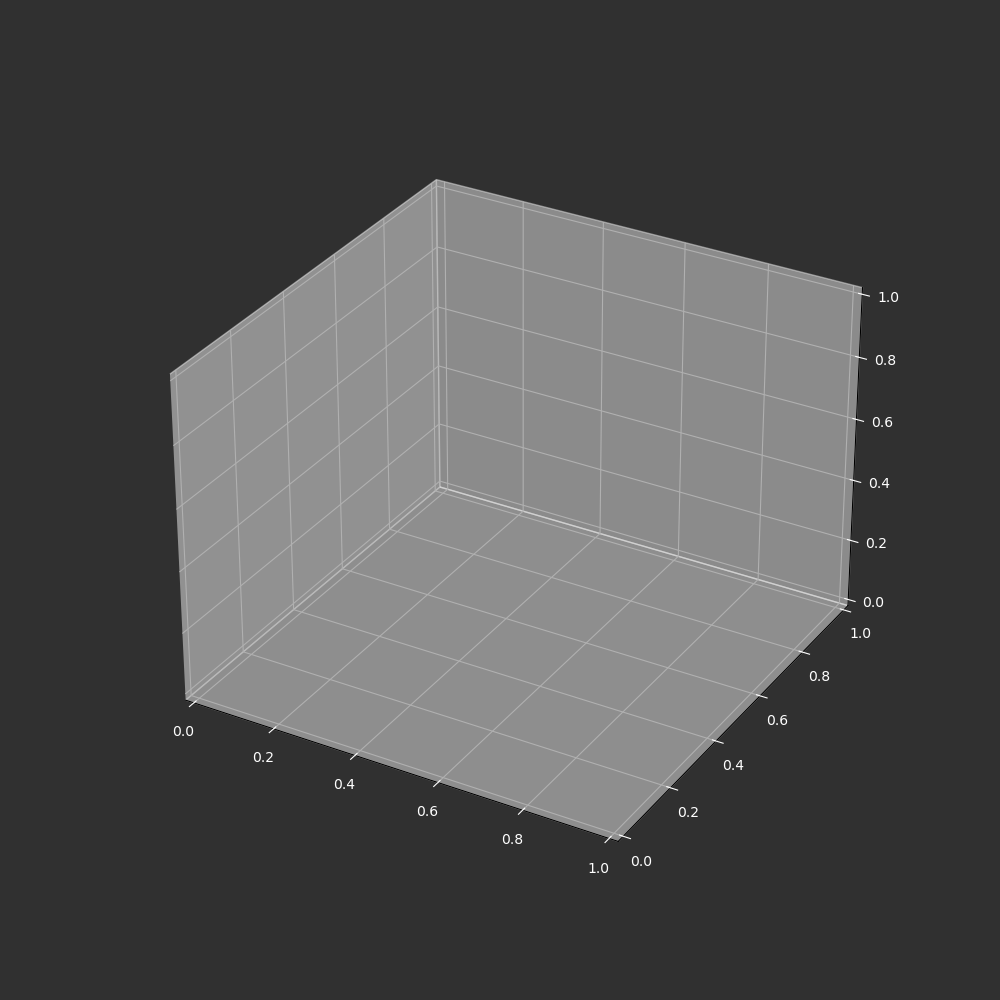

In [33]:
%matplotlib widget


Z_mse_plt: numpy.ndarray = mse


coord_best: tuple[int, int] = i_mse, j_mse


# Set up a figure twice as tall as it is wide
fig = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)


# Graph 3D MSE

# ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

## Display surface and points
_ = ax.plot_surface(X_plt, Y_plt, Z_mse_plt, color='blue', alpha=0.1)
_ = ax.scatter(X_plt, Y_plt, Z_mse_plt, color='green', marker='x')

## Display best point
# s_color, s_spatial, mse = X_plt[coord_best], Y_plt[coord_best], Z_mse_plt[coord_best]
# _ = ax.scatter(s_color, s_spatial, mse, color='red', marker='o')
# ax.text(s_color, s_spatial, mse, '({:.3f}, {}, {:.3f})'.format(s_color, s_spatial, mse), color='red')


# setting title and labels
ax.set_title('MSE', fontsize=fontsize)
ax.set_xlabel('$\sigma_{spatial}$')
ax.set_ylabel('$\sigma_{color}$')
ax.set_zlabel('mse')

matplotlib.pyplot.show()
